<a href="https://colab.research.google.com/github/GustavoPastorelli/Analise-de-dados/blob/main/Sugest%C3%A3o%20de%20A%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instalação de bibliotecas

### Subtask:
Instalar as bibliotecas necessárias para buscar dados de ações, realizar cálculos e plotar gráficos (por exemplo, `yfinance`, `pandas`, `matplotlib`, `streamlit`).


**Reasoning**:
Install the required libraries using pip.



In [1]:
!sudo apt-get install -y language-pack-pt-base

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
language-pack-pt-base is already the newest version (1:22.04+20240902).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [2]:
!pip install xlsxwriter

In [3]:
%pip install yfinance pandas matplotlib streamlit

## Busca de dados da ação

### Subtask:
Obter os dados históricos da ação escolhida (por exemplo, VALE3.SA ou PETR4.SA) usando uma biblioteca como `yfinance`. O usuário deve poder escolher a ação e o período.


**Reasoning**:
Import necessary libraries, define parameters for stock data fetching, download the data, and display the head and info of the resulting DataFrame.



In [4]:
import yfinance as yf
import pandas as pd
from datetime import datetime

# Define the stock ticker symbol
ticker_symbol = 'VALE3.SA'

# Define the start date for the historical data
start_date = datetime(2023, 1, 1)
# Removing the end_date to fetch data up to the latest available date

# Fetch the historical data
stock_data = yf.download(ticker_symbol, start=start_date) # Removed end_date

# Display the first few rows of the DataFrame
display(stock_data.head())

# Display the information about the DataFrame
display(stock_data.info())

/tmp/ipython-input-2651280616.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker_symbol, start=start_date) # Removed end_date
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,VALE3.SA,VALE3.SA,VALE3.SA,VALE3.SA,VALE3.SA
Date,,,,,
2023-01-02,70.104408,70.496491,69.422182,69.539808,12783800
2023-01-03,69.978920,70.645459,69.704463,70.104389,25332600
2023-01-04,70.104408,70.300450,68.967365,70.025993,26395300
2023-01-05,71.280647,71.892295,69.790732,70.151447,29085600
2023-01-06,72.409828,72.723496,71.359049,71.359049,31420600


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 710 entries, 2023-01-02 to 2025-10-31
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Close, VALE3.SA)   710 non-null    float64
 1   (High, VALE3.SA)    710 non-null    float64
 2   (Low, VALE3.SA)     710 non-null    float64
 3   (Open, VALE3.SA)    710 non-null    float64
 4   (Volume, VALE3.SA)  710 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 33.3 KB


None

## Cálculo de indicadores técnicos

### Subtask:
Implementar as funções para calcular as Médias Móveis (50 e 200 dias), Bandas de Bollinger e Níveis de Fibonacci com base nos dados da ação.


**Reasoning**:
Implement the functions to calculate SMA, Bollinger Bands, and Fibonacci levels and apply them to the stock_data DataFrame.



In [5]:
def calculate_sma(data, window):
  """Calculates the Simple Moving Average."""
  return data['Close'].rolling(window=window).mean()

def calculate_bollinger_bands(data, window=20):
  """Calculates Bollinger Bands."""
  rolling_mean = data['Close'].rolling(window=window).mean()
  rolling_std = data['Close'].rolling(window=window).std()
  data['Bollinger_Middle'] = rolling_mean
  data['Bollinger_Upper'] = rolling_mean + (rolling_std * 2)
  data['Bollinger_Lower'] = rolling_mean - (rolling_std * 2)
  return data

def calculate_fibonacci_levels(data):
  """Calculates Fibonacci Retracement Levels."""
  # Find the highest high and lowest low in the entire dataset
  highest_high = data['High'].max()
  lowest_low = data['Low'].min()

  # Calculate the range
  price_range = highest_high - lowest_low

  # Calculate Fibonacci levels
  fib_levels = {
      '0%': highest_high,
      '23.6%': highest_high - (price_range * 0.236),
      '38.2%': highest_high - (price_range * 0.382),
      '50%': highest_high - (price_range * 0.5),
      '61.8%': highest_high - (price_range * 0.618),
      '78.6%': highest_high - (price_range * 0.786),
      '100%': lowest_low
  }
  return fib_levels

# Calculate SMAs and add to DataFrame
stock_data['SMA_50'] = calculate_sma(stock_data, 50)
stock_data['SMA_200'] = calculate_sma(stock_data, 200)

# Calculate Bollinger Bands and add to DataFrame
stock_data = calculate_bollinger_bands(stock_data)

# Calculate Fibonacci levels
fibonacci_levels = calculate_fibonacci_levels(stock_data)

# Display the updated DataFrame with SMAs and Bollinger Bands
display(stock_data.head())
display(stock_data.tail())

# Display Fibonacci levels
display(fibonacci_levels)

Price,Close,High,Low,Open,Volume,SMA_50,SMA_200,Bollinger_Middle,Bollinger_Upper,Bollinger_Lower
Ticker,VALE3.SA,VALE3.SA,VALE3.SA,VALE3.SA,VALE3.SA,,,,,
Date,,,,,,,,,,
2023-01-02,70.104408,70.496491,69.422182,69.539808,12783800,NaN,NaN,NaN,NaN,NaN
2023-01-03,69.978920,70.645459,69.704463,70.104389,25332600,NaN,NaN,NaN,NaN,NaN
2023-01-04,70.104408,70.300450,68.967365,70.025993,26395300,NaN,NaN,NaN,NaN,NaN
2023-01-05,71.280647,71.892295,69.790732,70.151447,29085600,NaN,NaN,NaN,NaN,NaN
2023-01-06,72.409828,72.723496,71.359049,71.359049,31420600,NaN,NaN,NaN,NaN,NaN


Price,Close,High,Low,Open,Volume,SMA_50,SMA_200,Bollinger_Middle,Bollinger_Upper,Bollinger_Lower
Ticker,VALE3.SA,VALE3.SA,VALE3.SA,VALE3.SA,VALE3.SA,,,,,
Date,,,,,,,,,,
2025-10-27,61.660000,62.160000,61.400002,62.060001,12018100,57.7158,53.468728,59.9110,62.485113,57.336888
2025-10-28,62.200001,62.540001,61.580002,61.660000,15797400,57.8950,53.540255,60.1420,62.664009,57.619991
2025-10-29,63.330002,63.689999,62.709999,62.820000,30844900,58.1016,53.615852,60.3930,63.136783,57.649218
2025-10-30,63.810001,64.000000,62.930000,63.110001,25586000,58.3088,53.690362,60.6485,63.666470,57.630530
2025-10-31,65.260002,65.550003,63.869999,64.279999,38962700,58.5182,53.771797,60.9820,64.478397,57.485604


{'0%': Ticker
 VALE3.SA    77.075623
 dtype: float64,
 '23.6%': Ticker
 VALE3.SA    70.005308
 dtype: float64,
 '38.2%': Ticker
 VALE3.SA    65.6313
 dtype: float64,
 '50%': Ticker
 VALE3.SA    62.096143
 dtype: float64,
 '61.8%': Ticker
 VALE3.SA    58.560986
 dtype: float64,
 '78.6%': Ticker
 VALE3.SA    53.527881
 dtype: float64,
 '100%': Ticker
 VALE3.SA    47.116663
 dtype: float64}

## Visualização dos dados e indicadores

### Subtask:
Criar um gráfico que mostre o preço de fechamento da ação, as médias móveis, as bandas de Bollinger e os níveis de Fibonacci.


**Reasoning**:
Plot the stock closing price, moving averages, Bollinger bands, and Fibonacci levels on a single plot as instructed.



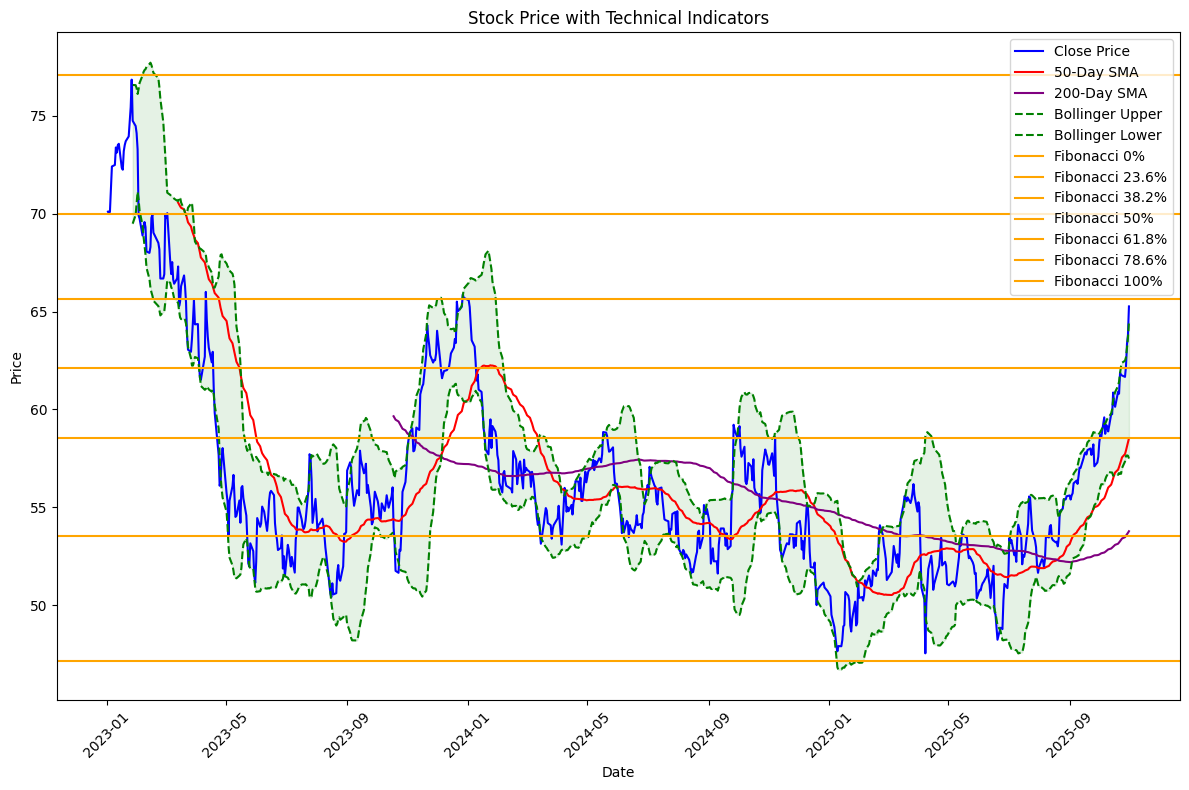

In [6]:
import matplotlib.pyplot as plt

# Create a figure and axes object
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the Close price
ax.plot(stock_data.index, stock_data['Close'], label='Close Price', color='blue')

# Plot the SMAs
ax.plot(stock_data.index, stock_data['SMA_50'], label='50-Day SMA', color='red')
ax.plot(stock_data.index, stock_data['SMA_200'], label='200-Day SMA', color='purple')

# Plot the Bollinger Bands
ax.plot(stock_data.index, stock_data['Bollinger_Upper'], label='Bollinger Upper', color='green', linestyle='--')
ax.plot(stock_data.index, stock_data['Bollinger_Lower'], label='Bollinger Lower', color='green', linestyle='--')
# Shade the area between Bollinger Bands
ax.fill_between(stock_data.index, stock_data['Bollinger_Lower'], stock_data['Bollinger_Upper'], color='green', alpha=0.1)


# Plot Fibonacci levels
for level, price in fibonacci_levels.items():
    ax.axhline(y=price.iloc[0], color='orange', linestyle='-', label=f'Fibonacci {level}')

# Set title and labels
ax.set_title("Stock Price with Technical Indicators")
ax.set_xlabel("Date")
ax.set_ylabel("Price")

# Add legend
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

## Criação da interface com streamlit

### Subtask:
Desenvolver a aplicação Streamlit para permitir que o usuário insira o código da ação, visualize o gráfico e, se necessário, ajuste parâmetros dos indicadores.


**Reasoning**:
Import the streamlit library and set up the basic structure of the Streamlit application.



2025-11-02 16:13:13.957 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-02 16:13:14.206 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-11-02 16:13:14.207 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-02 16:13:14.207 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-02 16:13:14.210 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-02 16:13:14.212 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-02 16:13:14.212 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-02 16:13:14.214 Thread 'MainThread': mi

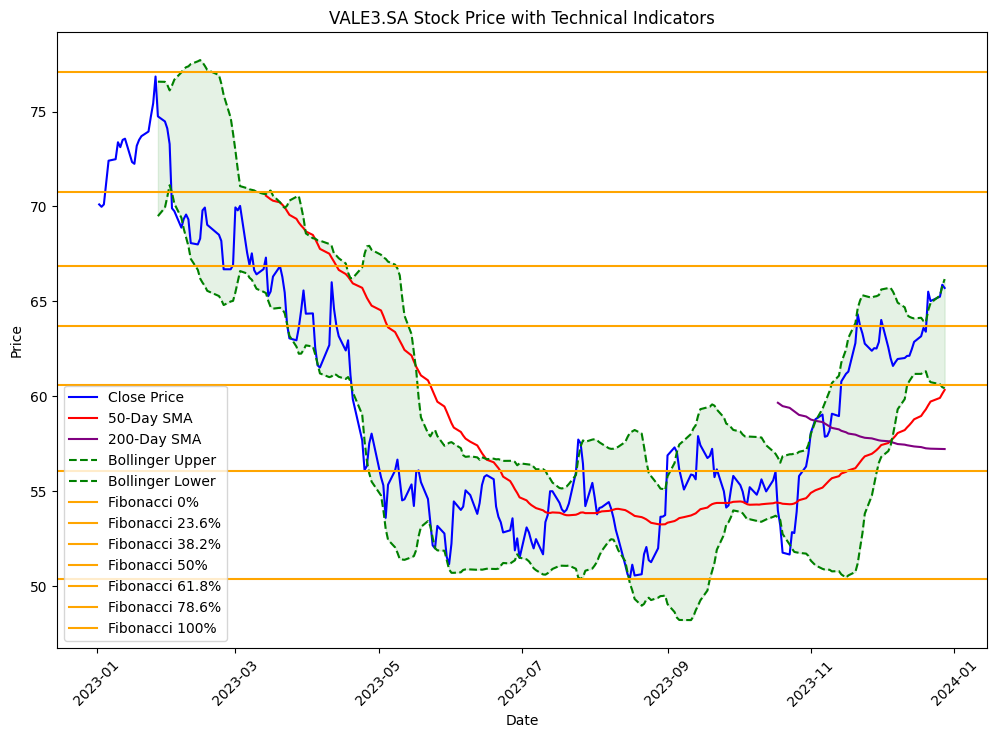

In [7]:
import streamlit as st
import yfinance as yf
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Set up the basic structure of the Streamlit application
st.title("Stock Price with Technical Indicators")
st.write("Visualize stock data with technical indicators (SMAs, Bollinger Bands, and Fibonacci Levels).")

# Add a text input widget for the user to enter the stock ticker symbol
ticker_symbol = st.text_input("Enter Stock Ticker Symbol (e.g., VALE3.SA)", "VALE3.SA")

# Add date input widgets for the user to select the start and end dates
col1, col2 = st.columns(2)
with col1:
    start_date = st.date_input("Start Date", datetime(2023, 1, 1))
with col2:
    end_date = st.date_input("End Date", datetime(2024, 1, 1))

# Convert dates to datetime objects
start_date = datetime.combine(start_date, datetime.min.time())
end_date = datetime.combine(end_date, datetime.min.time())

# Use the user inputs to fetch the stock data using yfinance
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Check if data was fetched successfully
if stock_data.empty:
    st.warning("No data found for the specified ticker symbol and date range.")
else:
    # Calculate the technical indicators (SMAs, Bollinger Bands, and Fibonacci levels)
    def calculate_sma(data, window):
        """Calculates the Simple Moving Average."""
        return data['Close'].rolling(window=window).mean()

    def calculate_bollinger_bands(data, window=20):
        """Calculates Bollinger Bands."""
        rolling_mean = data['Close'].rolling(window=window).mean()
        rolling_std = data['Close'].rolling(window=window).std()
        data['Bollinger_Middle'] = rolling_mean
        data['Bollinger_Upper'] = rolling_mean + (rolling_std * 2)
        data['Bollinger_Lower'] = rolling_mean - (rolling_std * 2)
        return data

    def calculate_fibonacci_levels(data):
        """Calculates Fibonacci Retracement Levels."""
        # Find the highest high and lowest low in the entire dataset
        highest_high = data['High'].max()
        lowest_low = data['Low'].min()

        # Calculate the range
        price_range = highest_high - lowest_low

        # Calculate Fibonacci levels
        fib_levels = {
            '0%': highest_high,
            '23.6%': highest_high - (price_range * 0.236),
            '38.2%': highest_high - (price_range * 0.382),
            '50%': highest_high - (price_range * 0.5),
            '61.8%': highest_high - (price_range * 0.618),
            '78.6%': highest_high - (price_range * 0.786),
            '100%': lowest_low
        }
        return fib_levels

    # Add options or input widgets for adjusting parameters of the indicators
    st.sidebar.header("Indicator Parameters")
    sma_50_window = st.sidebar.slider("SMA 50 Window", 10, 100, 50)
    sma_200_window = st.sidebar.slider("SMA 200 Window", 50, 300, 200)
    bollinger_window = st.sidebar.slider("Bollinger Bands Window", 10, 50, 20)

    # Calculate SMAs and add to DataFrame
    stock_data['SMA_50'] = calculate_sma(stock_data, sma_50_window)
    stock_data['SMA_200'] = calculate_sma(stock_data, sma_200_window)

    # Calculate Bollinger Bands and add to DataFrame
    stock_data = calculate_bollinger_bands(stock_data, bollinger_window)

    # Calculate Fibonacci levels
    fibonacci_levels = calculate_fibonacci_levels(stock_data)

    # Create the plot showing the stock data and technical indicators
    fig, ax = plt.subplots(figsize=(12, 8))

    # Plot the Close price
    ax.plot(stock_data.index, stock_data['Close'], label='Close Price', color='blue')

    # Plot the SMAs
    ax.plot(stock_data.index, stock_data[f'SMA_{sma_50_window}'], label=f'{sma_50_window}-Day SMA', color='red')
    ax.plot(stock_data.index, stock_data[f'SMA_{sma_200_window}'], label=f'{sma_200_window}-Day SMA', color='purple')

    # Plot the Bollinger Bands
    ax.plot(stock_data.index, stock_data['Bollinger_Upper'], label='Bollinger Upper', color='green', linestyle='--')
    ax.plot(stock_data.index, stock_data['Bollinger_Lower'], label='Bollinger Lower', color='green', linestyle='--')
    # Shade the area between Bollinger Bands
    ax.fill_between(stock_data.index, stock_data['Bollinger_Lower'], stock_data['Bollinger_Upper'], color='green', alpha=0.1)


    # Plot Fibonacci levels
    for level, price in fibonacci_levels.items():
        ax.axhline(y=price.iloc[0], color='orange', linestyle='-', label=f'Fibonacci {level}')

    # Set title and labels
    ax.set_title(f"{ticker_symbol} Stock Price with Technical Indicators")
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")

    # Add legend
    ax.legend()

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Display the plot in the Streamlit application
    st.pyplot(fig)

In [8]:
streamlit_code = """
import streamlit as st
import yfinance as yf
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Set up the basic structure of the Streamlit application
st.title("Stock Price with Technical Indicators")
st.write("Visualize stock data with technical indicators (SMAs, Bollinger Bands, and Fibonacci Levels).")

# Add a text input widget for the user to enter the stock ticker symbol
ticker_symbol = st.text_input("Enter Stock Ticker Symbol (e.g., VALE3.SA)", "VALE3.SA")

# Add date input widgets for the user to select the start and end dates
col1, col2 = st.columns(2)
with col1:
    start_date = st.date_input("Start Date", datetime(2023, 1, 1))
with col2:
    # Set end date to today's date by default
    end_date = st.date_input("End Date", datetime.now().date())

# Convert dates to datetime objects
start_date = datetime.combine(start_date, datetime.min.time())
end_date = datetime.combine(end_date, datetime.max.time()) # Use max.time() for end_date to include the whole day

# Use the user inputs to fetch the stock data using yfinance
try:
    stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

    # Check if data was fetched successfully
    if stock_data.empty:
        st.warning("No data found for the specified ticker symbol and date range.")
    else:
        # Calculate the technical indicators (SMAs, Bollinger Bands, and Fibonacci levels)
        def calculate_sma(data, window):
            # Calculates the Simple Moving Average.
            # Ensure the correct column is used for calculation based on the DataFrame structure
            if ('Close', ticker_symbol) in data.columns:
                return data[('Close', ticker_symbol)].rolling(window=window).mean()
            else:
                return data['Close'].rolling(window=window).mean()


        def calculate_bollinger_bands(data, window=20):
            # Calculates Bollinger Bands.
            # Ensure the correct 'Close' column is used based on the DataFrame structure
            close_price = data[('Close', ticker_symbol)] if ('Close', ticker_symbol) in data.columns else data['Close']

            rolling_mean = close_price.rolling(window=window).mean()
            rolling_std = close_price.rolling(window=window).std()
            data['Bollinger_Middle'] = rolling_mean
            data['Bollinger_Upper'] = rolling_mean + (rolling_std * 2)
            data['Bollinger_Lower'] = rolling_mean - (rolling_std * 2)
            return data

        def calculate_fibonacci_levels(data):
            # Calculates Fibonacci Retracement Levels.
            # Ensure the correct 'High' and 'Low' columns are used based on the DataFrame structure
            high_price = data[('High', ticker_symbol)] if ('High', ticker_symbol) in data.columns else data['High']
            low_price = data[('Low', ticker_symbol)] if ('Low', ticker_symbol) in data.columns else data['Low']


            # Find the highest high and lowest low in the entire dataset
            highest_high = high_price.max()
            lowest_low = low_price.min()

            # Calculate the range
            price_range = highest_high - lowest_low

            # Calculate Fibonacci levels
            fib_levels = {
                '0%': highest_high,
                '23.6%': highest_high - (price_range * 0.236),
                '38.2%': highest_high - (price_range * 0.382),
                '50%': highest_high - (price_range * 0.5),
                '61.8%': highest_high - (price_range * 0.618),
                '78.6%': highest_high - (price_range * 0.786),
                '100%': lowest_low
            }
            return fib_levels

        # Add options or input widgets for adjusting parameters of the indicators
        st.sidebar.header("Indicator Parameters")
        sma_50_window = st.sidebar.slider("SMA 50 Window", 10, 100, 50)
        sma_200_window = st.sidebar.slider("SMA 200 Window", 50, 300, 200)
        bollinger_window = st.sidebar.slider("Bollinger Bands Window", 10, 50, 20)

        # Calculate SMAs and add to DataFrame
        stock_data[f'SMA_{sma_50_window}'] = calculate_sma(stock_data, sma_50_window)
        stock_data[f'SMA_{sma_200_window}'] = calculate_sma(stock_data, sma_200_window)

        # Calculate Bollinger Bands and add to DataFrame
        stock_data = calculate_bollinger_bands(stock_data, bollinger_window)

        # Calculate Fibonacci levels
        fibonacci_levels = calculate_fibonacci_levels(stock_data)

        # Create the plot showing the stock data and technical indicators
        fig, ax = plt.subplots(figsize=(12, 8))

        # Plot the Close price - Ensure the correct 'Close' column is used based on the DataFrame structure
        close_price_col = ('Close', ticker_symbol) if ('Close', ticker_symbol) in stock_data.columns else 'Close'
        ax.plot(stock_data.index, stock_data[close_price_col], label='Close Price', color='blue')


        # Plot the SMAs - Use f-strings for dynamic column names
        ax.plot(stock_data.index, stock_data[f'SMA_{sma_50_window}'], label=f'{sma_50_window}-Day SMA', color='red')
        ax.plot(stock_data.index, stock_data[f'SMA_{sma_200_window}'], label=f'{sma_200_window}-Day SMA', color='purple')

        # Plot the Bollinger Bands
        ax.plot(stock_data.index, stock_data['Bollinger_Upper'], label='Bollinger Upper', color='green', linestyle='--')
        ax.plot(stock_data.index, stock_data['Bollinger_Lower'], label='Bollinger Lower', color='green', linestyle='--')
        # Shade the area between Bollinger Bands
        ax.fill_between(stock_data.index, stock_data['Bollinger_Lower'], stock_data['Bollinger_Upper'], color='green', alpha=0.1)


        # Plot Fibonacci levels
        for level, price in fibonacci_levels.items():
            # Check if price is a pandas Series and extract the scalar value
            if isinstance(price, pd.Series):
                price_value = price.iloc[0]
            else:
                price_value = price
            ax.axhline(y=price_value, color='orange', linestyle='-', label=f'Fibonacci {level}')


        # Set title and labels
        ax.set_title(f"{ticker_symbol} Stock Price with Technical Indicators")
        ax.set_xlabel("Date")
        ax.set_ylabel("Price")

        # Add legend
        ax.legend()

        # Rotate x-axis labels for better readability
        plt.xticks(rotation=45)

        # Display the plot in the Streamlit application
        st.pyplot(fig)

except Exception as e:
    st.error(f"An error occurred: {e}")

"""

with open("app.py", "w") as f:
    f.write(streamlit_code)

In [9]:
!curl -s http://whatismyip.akamai.com/

34.125.116.58

In [ ]:
!streamlit run app.py &>/dev/null&
!npm install -g localtunnel
!lt --port 8501

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧
changed 22 packages in 3s
⠧
⠧3 packages are looking for funding
⠧  run `npm fund` for details
⠧your url is: https://calm-loops-wait.loca.lt
